## File Contents

- Importing Libraries

- Loading and exploring the dataset

- Data Cleaning and Preprocessing

- Feature Selection

- EDA 

- Model Building

- Model Comparison

#Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Loading and exploring the dataset

In [ ]:
df= pd.read_csv('/content/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print("Dataset with rows {} and columns {}".format(df.shape[0],df.shape[1]))
df.info()

Dataset with rows 10000 and columns 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df=df.drop("RowNumber", axis=1)


In [ ]:
df=df.drop("Surname", axis=1)

In [ ]:
df.head

<bound method NDFrame.head of       CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0       15634602          619    France  Female   42       2       0.00   
1       15647311          608     Spain  Female   41       1   83807.86   
2       15619304          502    France  Female   42       8  159660.80   
3       15701354          699    France  Female   39       1       0.00   
4       15737888          850     Spain  Female   43       2  125510.82   
...          ...          ...       ...     ...  ...     ...        ...   
9995    15606229          771    France    Male   39       5       0.00   
9996    15569892          516    France    Male   35      10   57369.61   
9997    15584532          709    France  Female   36       7       0.00   
9998    15682355          772   Germany    Male   42       3   75075.31   
9999    15628319          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exit

In [ ]:
#Target Variable
df.Exited.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

#Data Cleaning and Preprocessing 

In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#Using Label Encoder in order to use correlation matrix for all valriables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df= df.apply(le.fit_transform)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2736,228,0,0,24,2,0,0,1,1,5068,1
1,3258,217,2,0,23,1,743,0,0,1,5639,0
2,2104,111,0,0,24,8,5793,2,1,0,5707,1
3,5435,308,0,0,21,1,0,1,0,0,4704,0
4,6899,459,2,0,25,2,3696,0,1,1,3925,0


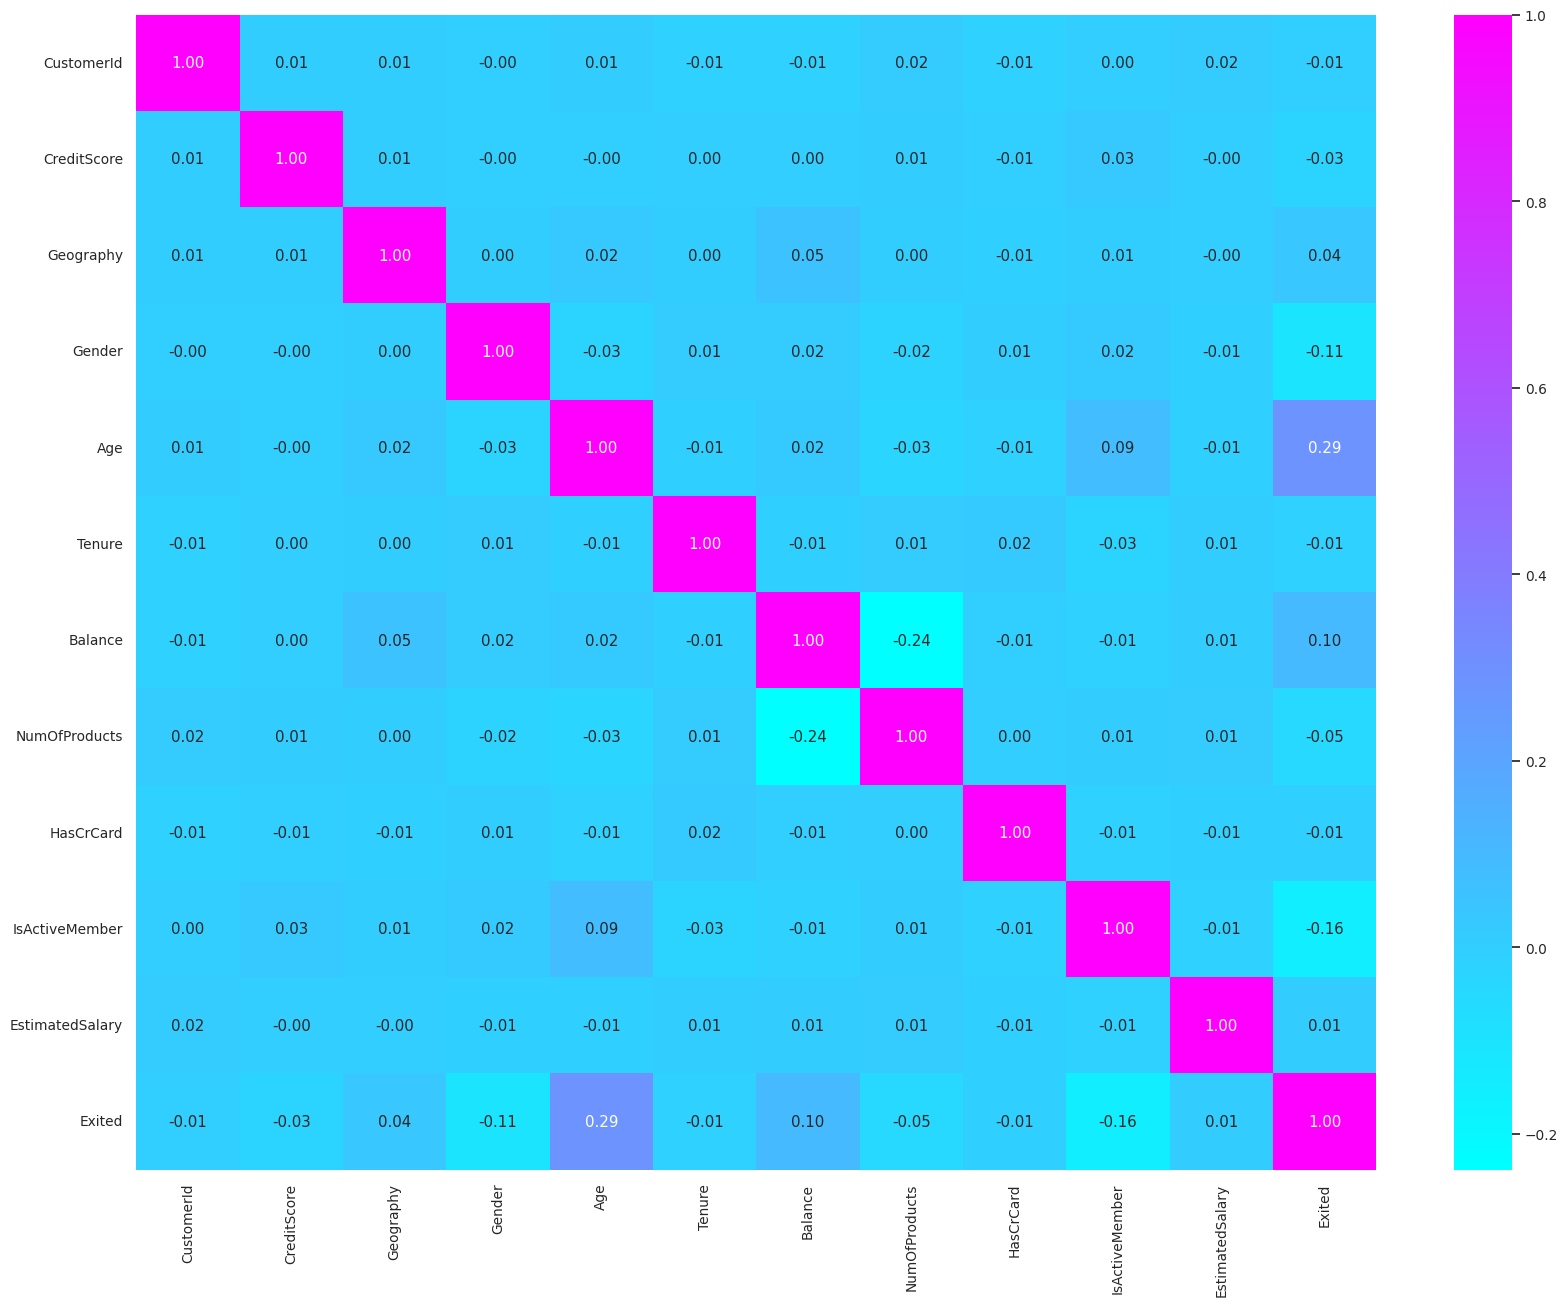

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt= '.2f', cmap='cool')
plt.show()

#Exploratory Data Analytics 
###(Univariate, Bivariate, Multivariate)

In [ ]:
 churn=df

In [ ]:
import scipy.stats as st
churn.drop('CustomerId', axis=1, inplace=True)

In [ ]:
churn_num = churn.select_dtypes('number').columns
churn_cat = churn.select_dtypes('object').columns

In [ ]:
def outlier(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
            
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            non_outlier.append(num)
        if num <= upper_fence:
            non_outlier.append(num)
    
    print(f'sum of unique value : {len(outlier)}' )
    print(f'lower_value: {np.min(non_outlier)}')
    print(f'upper_vaue: {np.max(non_outlier)}')

1. CreditScore


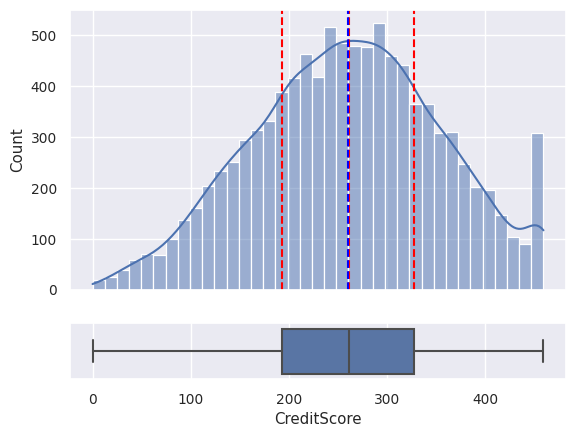

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 459
 
Data skewed with skew is -2.4434977206717523
 
Data not normal
--------------------------------------------------
 
2. Geography


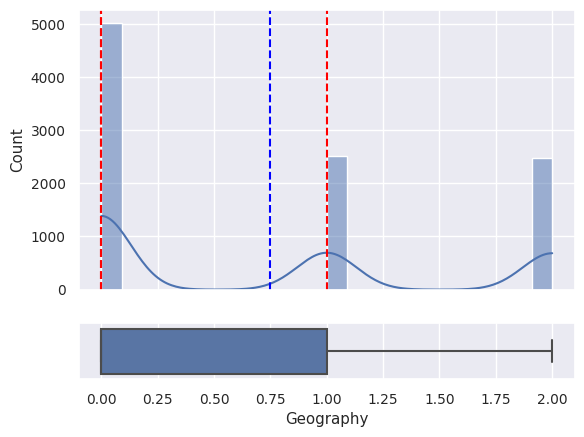

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 2
 
Data skewed with skew is 19.35940071396586
 
Data not normal
--------------------------------------------------
 
3. Gender


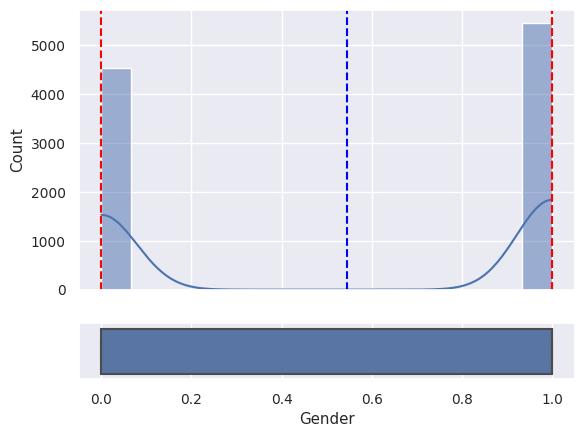

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 1
 
Data skewed with skew is -7.438108306425772
 
Data not normal
--------------------------------------------------
 
4. Age


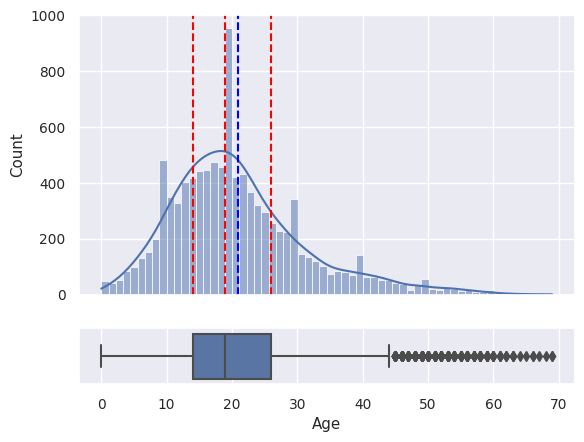

 
 
sum of unique value : 359
lower_value: 0
upper_vaue: 69
 
Data skewed with skew is 34.56282350618409
 
Data not normal
--------------------------------------------------
 
5. Tenure


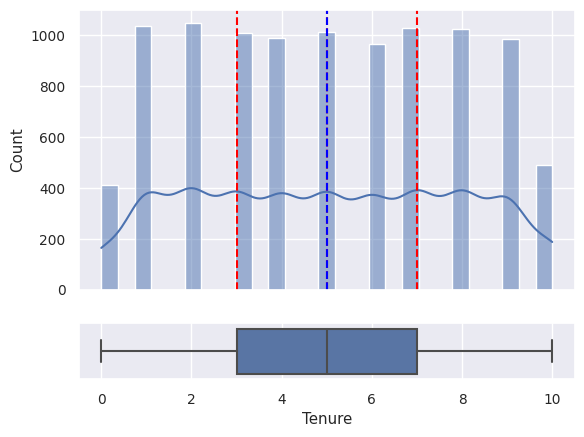

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 10
 
Data not skewed
 
Data not normal
--------------------------------------------------
 
6. Balance


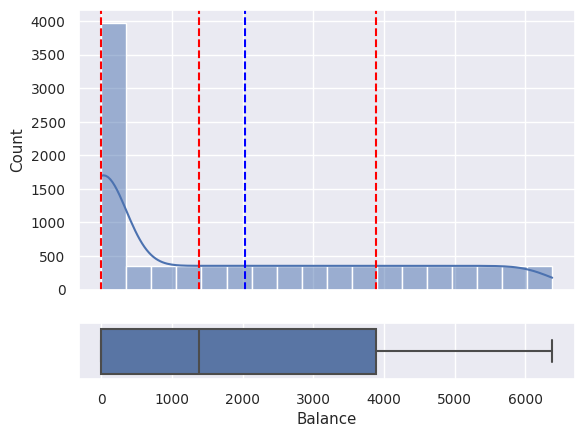

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 6381
 
Data skewed with skew is 21.556477841104375
 
Data not normal
--------------------------------------------------
 
7. NumOfProducts


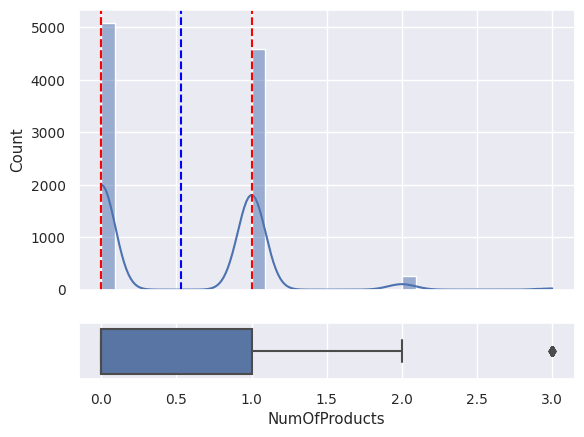

 
 
sum of unique value : 60
lower_value: 0
upper_vaue: 3
 
Data skewed with skew is 27.308956247437614
 
Data not normal
--------------------------------------------------
 
8. HasCrCard


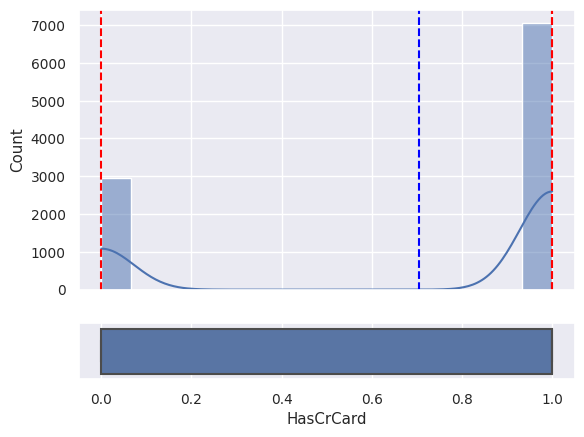

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 1
 
Data skewed with skew is -31.80680270602491
 
Data not normal
--------------------------------------------------
 
9. IsActiveMember


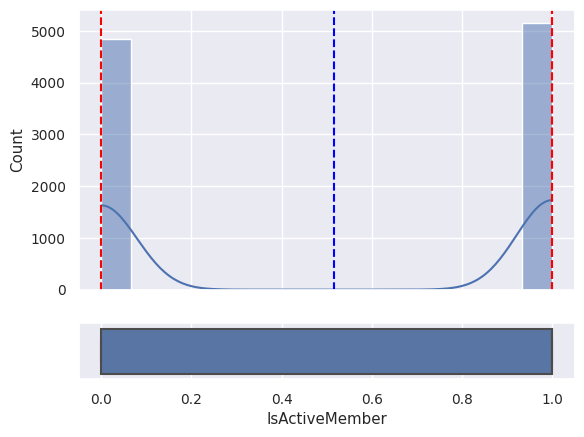

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 1
 
Data skewed with skew is -2.466548666286503
 
Data not normal
--------------------------------------------------
 
10. EstimatedSalary


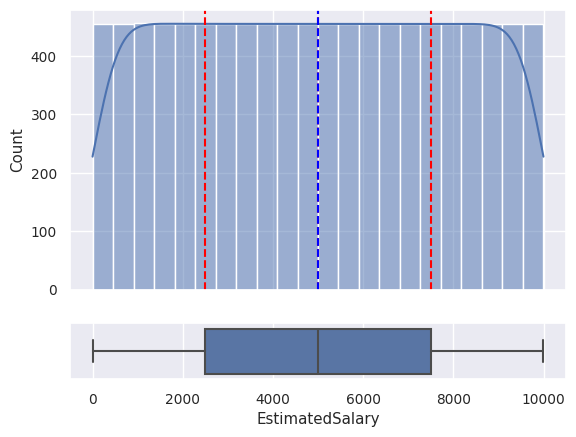

 
 
sum of unique value : 0
lower_value: 0
upper_vaue: 9998
 
Data not skewed
 
Data not normal
--------------------------------------------------
 
11. Exited


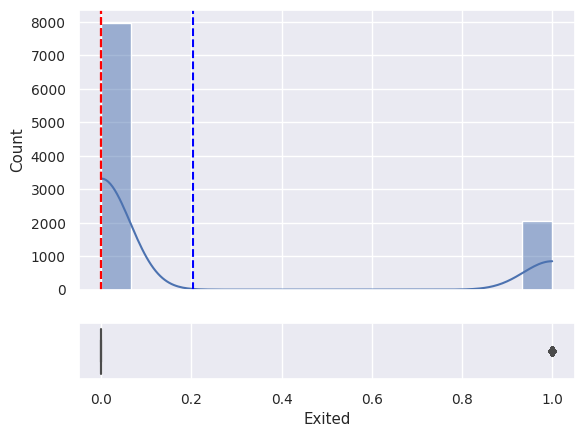

 
 
sum of unique value : 2037
lower_value: 0
upper_vaue: 1
 
Data skewed with skew is 45.099913008252294
 
Data not normal
--------------------------------------------------
 


In [ ]:
norm_data = []
for y,x in enumerate(churn_num,1):
    print(f'{y}. {x}')
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[5,1]})
    sns.histplot(data=churn, x=x, kde=True, ax=ax[0])
    ax[0].axvline(np.nanpercentile(churn[x], 25), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(churn[x], 50), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(churn[x], 75), c='red',linestyle='--')
    ax[0].axvline(np.mean(churn[x]), c='blue',linestyle='--')
    
    sns.boxplot(data=churn, x=x, ax=ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    print(' ')
    churn[x].describe()
    print(' ')
    outlier(churn[x])
    print(' ')
    sk, pval = st.skewtest(churn[x])
    if pval < 0.05:
        print(f'Data skewed with skew is {sk}')
    else:
        print(f'Data not skewed')
    print(' ')
    norm, pval = st.normaltest(churn[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    print('-'*50)
    print(' ')

1. CreditScore


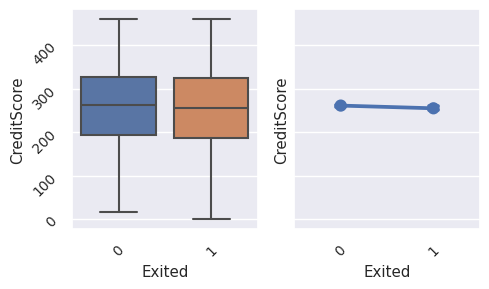

Confidence interval 95% for feature CreditScore churn customer is (252.670807652627, 256.5771059458021)
Confidence interval 95% for feature CreditScore non-churn customer is (258.97852589544203, 262.72861965271824)
 
there is different mean for churn customer and not churn customer in CreditScore
 
2. Geography


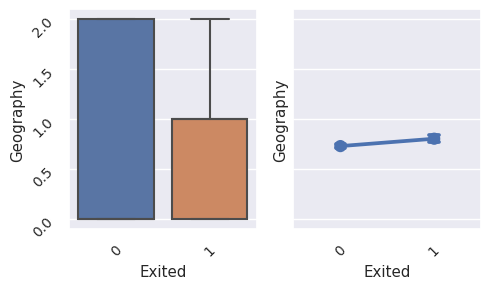

Confidence interval 95% for feature Geography churn customer is (0.7903946535767544, 0.8198164411704228)
Confidence interval 95% for feature Geography non-churn customer is (0.7146814573396569, 0.747832670501609)
 
there is different mean for churn customer and not churn customer in Geography
 
3. Gender


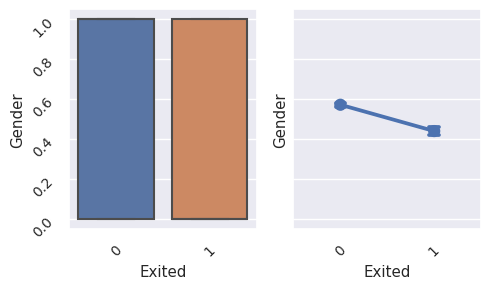

Confidence interval 95% for feature Gender churn customer is (0.43110520836795635, 0.4505835496094614)
Confidence interval 95% for feature Gender non-churn customer is (0.5628246491029913, 0.5822211878931156)
 
there is different mean for churn customer and not churn customer in Gender
 
4. Age


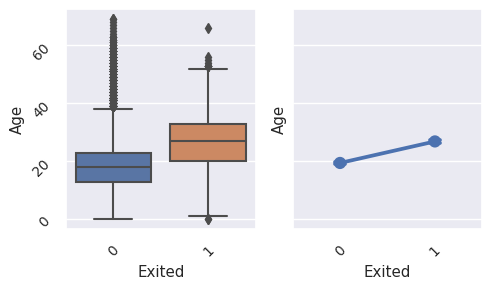

Confidence interval 95% for feature Age churn customer is (26.646560159107104, 27.029433949876697)
Confidence interval 95% for feature Age non-churn customer is (19.208549028275772, 19.60521462863745)
 
there is different mean for churn customer and not churn customer in Age
 
5. Tenure


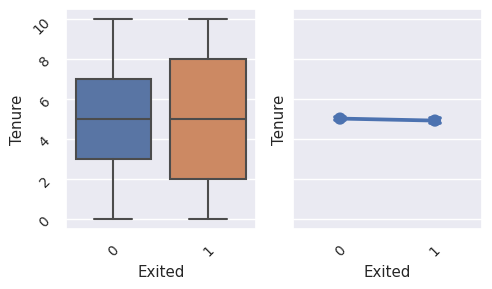

Confidence interval 95% for feature Tenure churn customer is (4.87516337588894, 4.990325087537668)
Confidence interval 95% for feature Tenure non-churn customer is (4.976810476517536, 5.089747353446046)
 
there is no different mean for churn customer and not churn customer in Tenure 
 
6. Balance


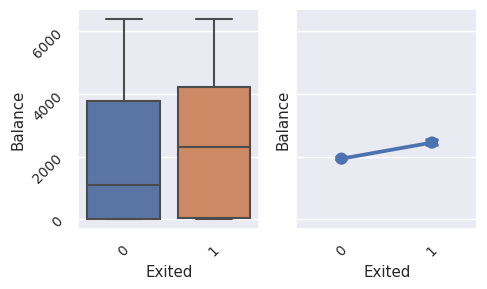

Confidence interval 95% for feature Balance churn customer is (2404.5581523519286, 2486.3726282077178)
Confidence interval 95% for feature Balance non-churn customer is (1890.634567305876, 1973.8557001812517)
 
there is different mean for churn customer and not churn customer in Balance
 
7. NumOfProducts


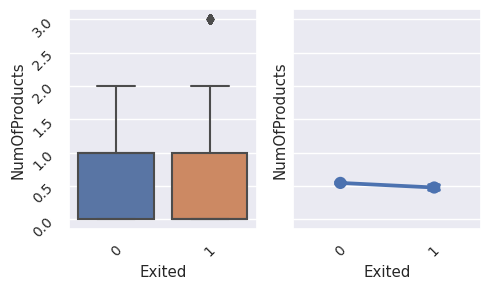

Confidence interval 95% for feature NumOfProducts churn customer is (0.4594897816586306, 0.4909274986555569)
Confidence interval 95% for feature NumOfProducts non-churn customer is (0.5342790048173021, 0.5542554671153865)
 
there is different mean for churn customer and not churn customer in NumOfProducts
 
8. HasCrCard


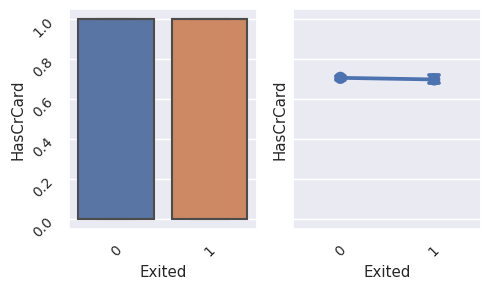

Confidence interval 95% for feature HasCrCard churn customer is (0.6900700598852719, 0.7080644516513014)
Confidence interval 95% for feature HasCrCard non-churn customer is (0.6982243803529652, 0.716066715967517)
 
there is no different mean for churn customer and not churn customer in HasCrCard 
 
9. IsActiveMember


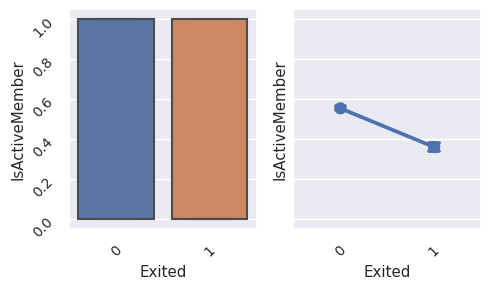

Confidence interval 95% for feature IsActiveMember churn customer is (0.35140430405185413, 0.37024518048422833)
Confidence interval 95% for feature IsActiveMember non-churn customer is (0.5448214789513818, 0.5643082460266416)
 
there is different mean for churn customer and not churn customer in IsActiveMember
 
10. EstimatedSalary


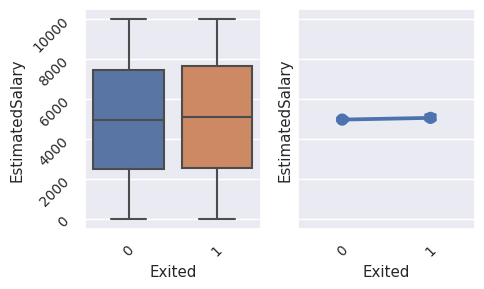

Confidence interval 95% for feature EstimatedSalary churn customer is (5010.5659245351635, 5124.572023427527)
Confidence interval 95% for feature EstimatedSalary non-churn customer is (4924.498680352036, 5037.468919798662)
 
there is no different mean for churn customer and not churn customer in EstimatedSalary 
 


In [ ]:
for y, x in enumerate(churn_num,1):
    if x != 'Exited':
        print(f'{y}. {x}')
        fig, ax = plt.subplots(1,2, figsize=(5,3), sharey=True)
        sns.boxplot(data=churn, y=x, x='Exited', ax=ax[0])
        sns.pointplot(data=churn, y=x, x='Exited', ax=ax[1], capsize=0.1)
        
        plt.tight_layout()
        ax[0].tick_params(rotation=45)
        ax[1].tick_params(rotation=45)
        plt.show()

        # confidence interval churn

        n = len(churn[x])
        ci1 = st.t.interval(alpha = 0.95,
                        df = len(churn[churn['Exited'] ==1]) - 1,
                        loc = churn[churn['Exited'] ==1][x].mean(), 
                        scale = churn[churn['Exited'] ==1][x].std()/(n**(1/2)))

        print(f'Confidence interval 95% for feature {x} churn customer is {ci1}')

        # confidence interval non-churn

        ci2 = st.t.interval(alpha = 0.95,
                        df = len(churn[churn['Exited'] ==0]) - 1,
                        loc = churn[churn['Exited'] ==0][x].mean(), 
                        scale = churn[churn['Exited'] ==0][x].std()/(n**(1/2)))

        print(f'Confidence interval 95% for feature {x} non-churn customer is {ci2}')

        # ind ttest

        stat, pvalue = st.ttest_ind(churn[churn['Exited'] ==1][x],
                                      churn[churn['Exited'] ==0][x])
        print(' ')
        if pvalue > 0.05:
            print(f'there is no different mean for churn customer and not churn customer in {x} ')
        else:
            print(f'there is different mean for churn customer and not churn customer in {x}')
        
        print(' ')

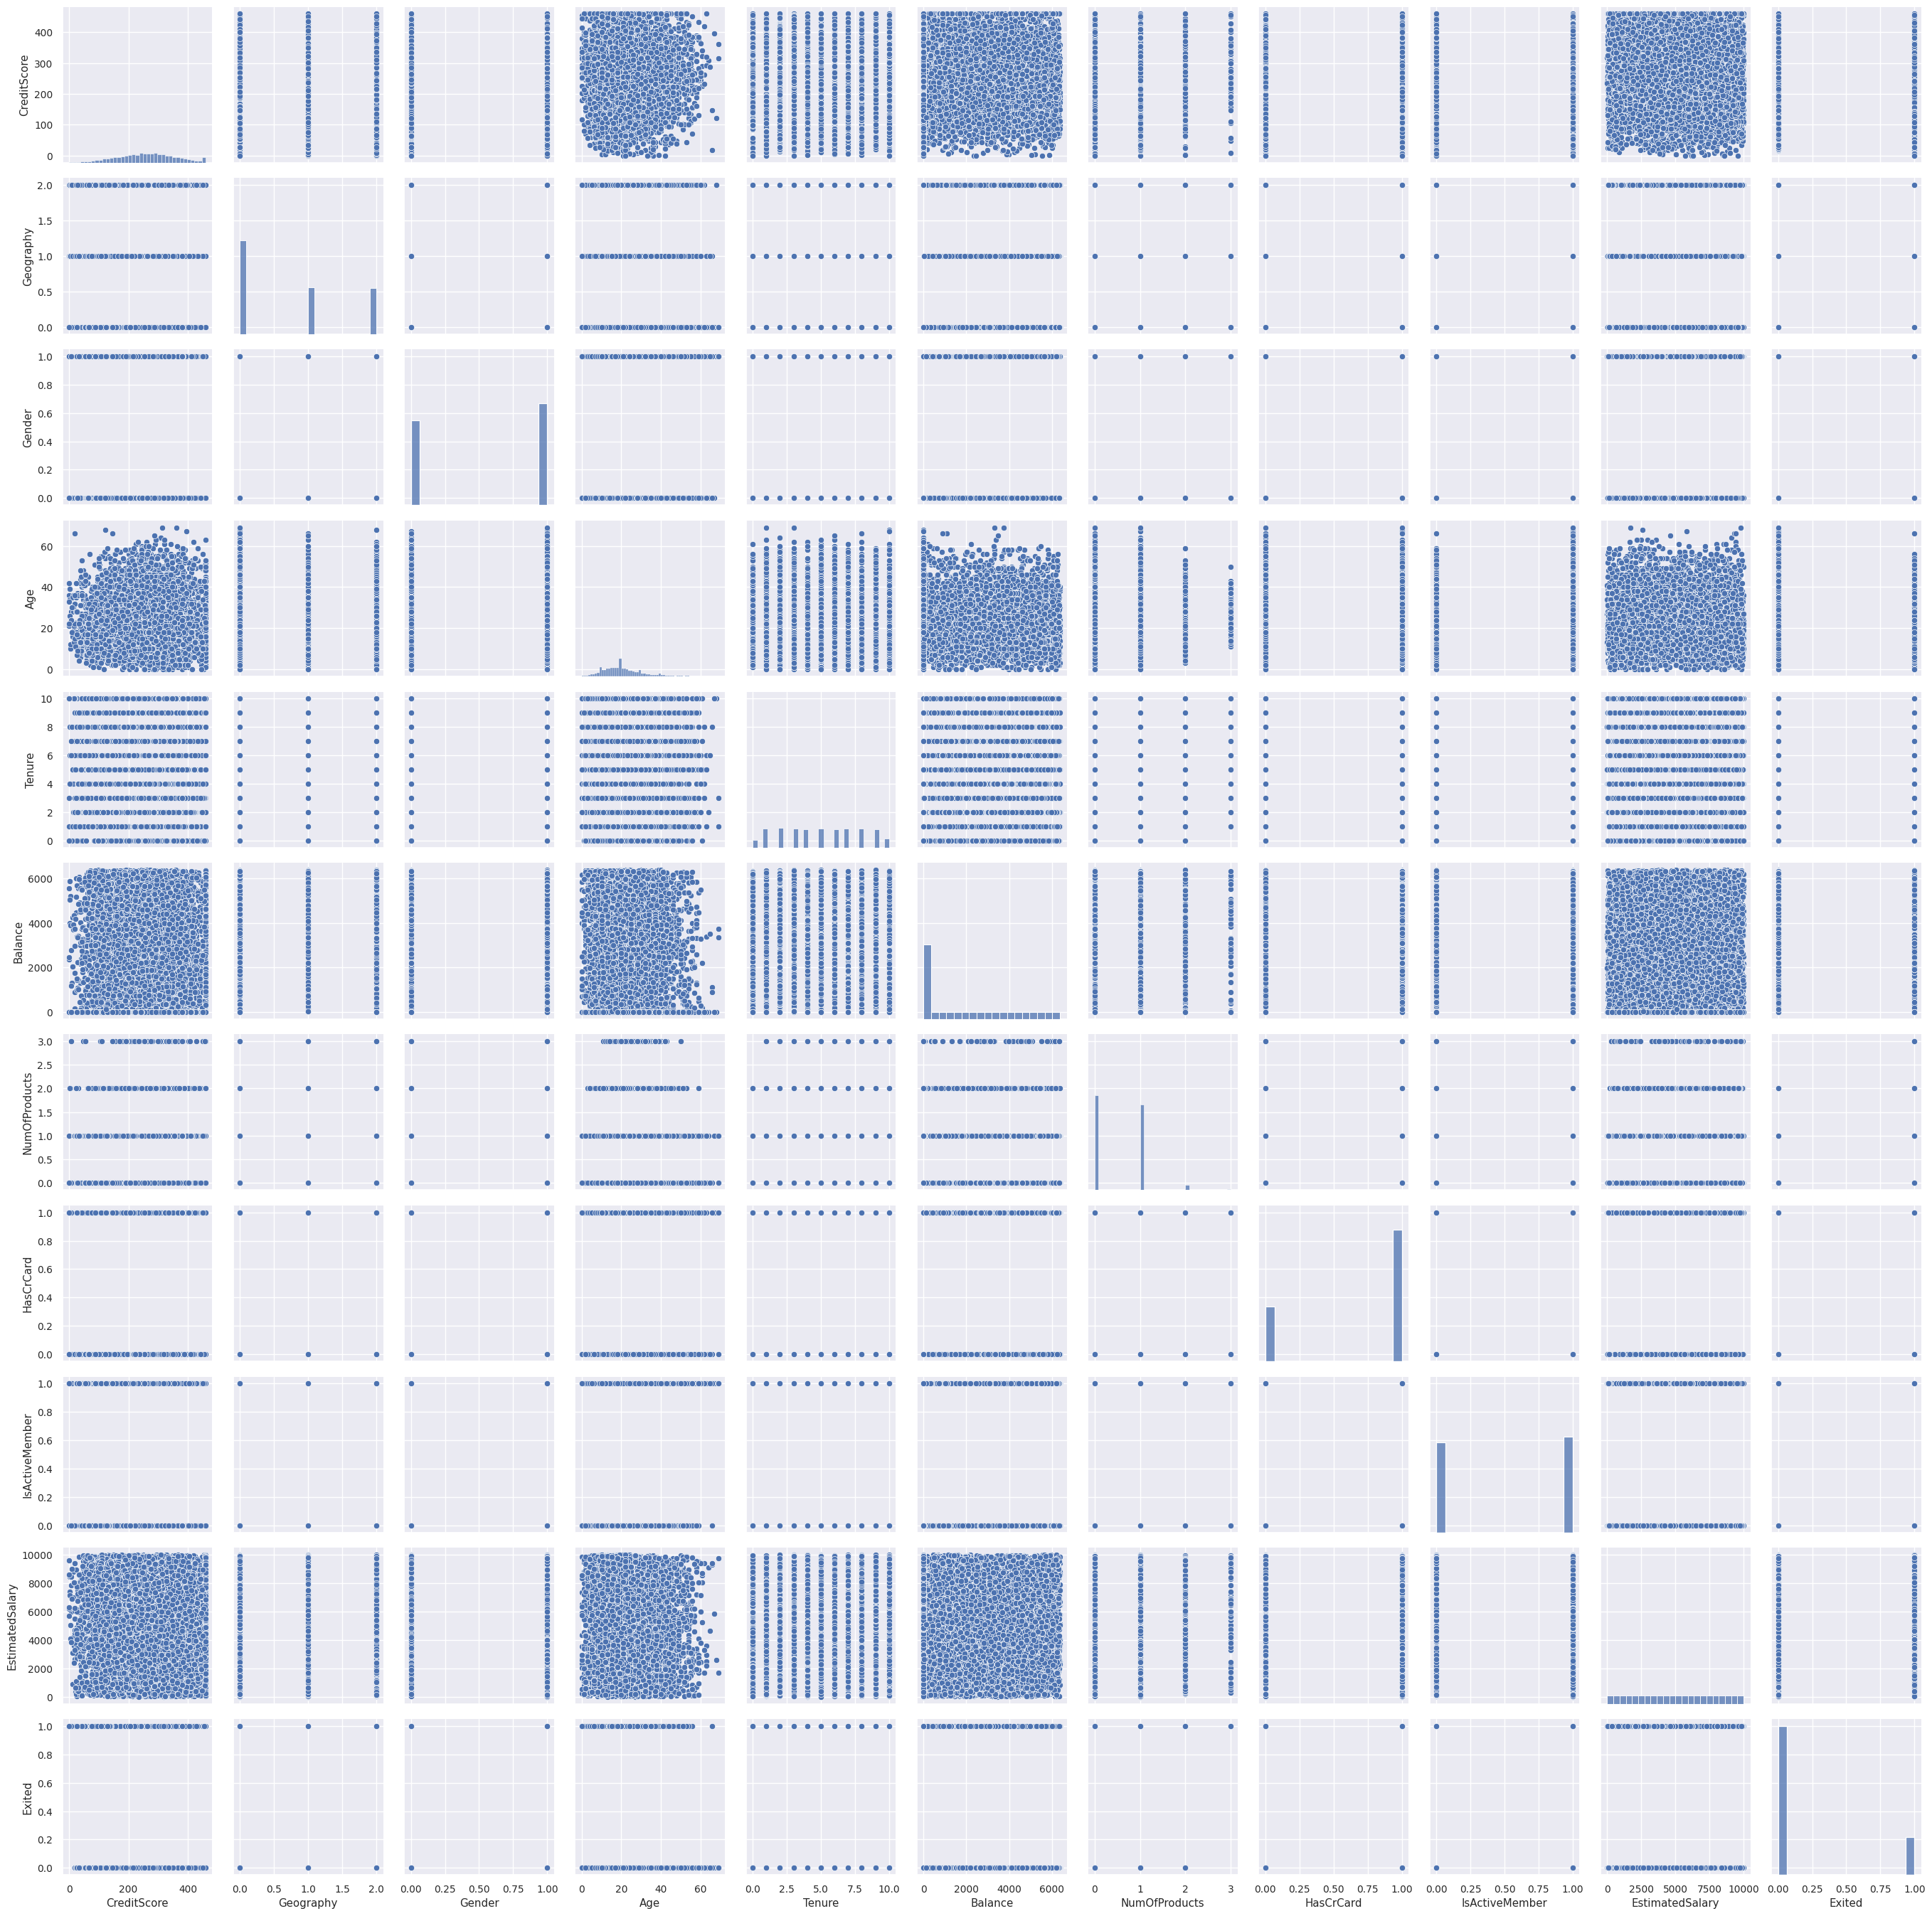

In [ ]:
g = sns.PairGrid(churn[churn_num])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

#Model building


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
x = df.iloc[:,0:12]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=56)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score

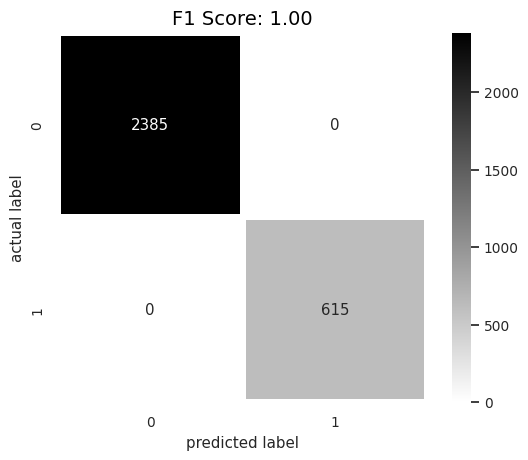

In [ ]:
f1_score_dtc = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_dtc:.2f}',size=14,color='black')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 250, criterion = 'entropy',random_state=0)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

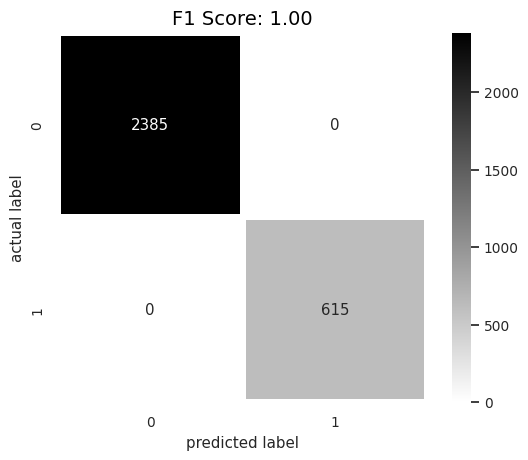

In [ ]:
f1_score_rfc = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_rfc:.2f}',size=14,color='black')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
logreg_def = LogisticRegression(random_state=42)
xgb_def = XGBClassifier(random_state=42)
ada_def = AdaBoostClassifier(random_state=42)

In [ ]:
logreg_def.fit(x_train,y_train)
y_pred = logreg_def.predict(x_test)

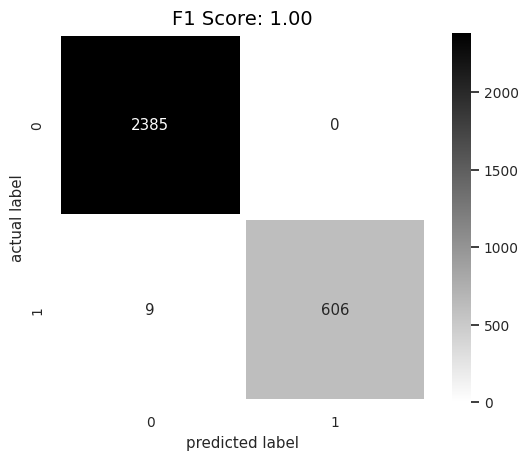

In [ ]:
f1_score_logr = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_logr:.2f}',size=14,color='black')
plt.show()

In [ ]:
xgb_def.fit(x_train,y_train)
y_pred = xgb_def.predict(x_test)

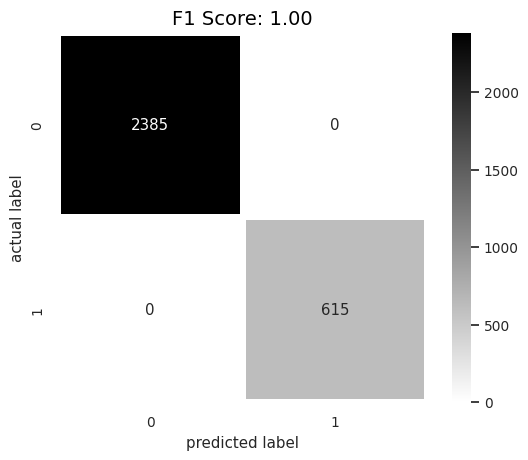

In [ ]:
f1_score_xgb = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_xgb:.2f}',size=14,color='black')
plt.show()

In [ ]:
ada_def.fit(x_train,y_train)
y_pred = ada_def.predict(x_test)

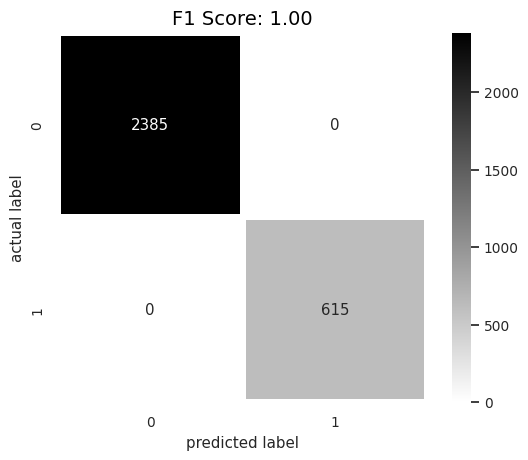

In [ ]:
f1_score_ada = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_ada:.2f}',size=14,color='black')
plt.show()

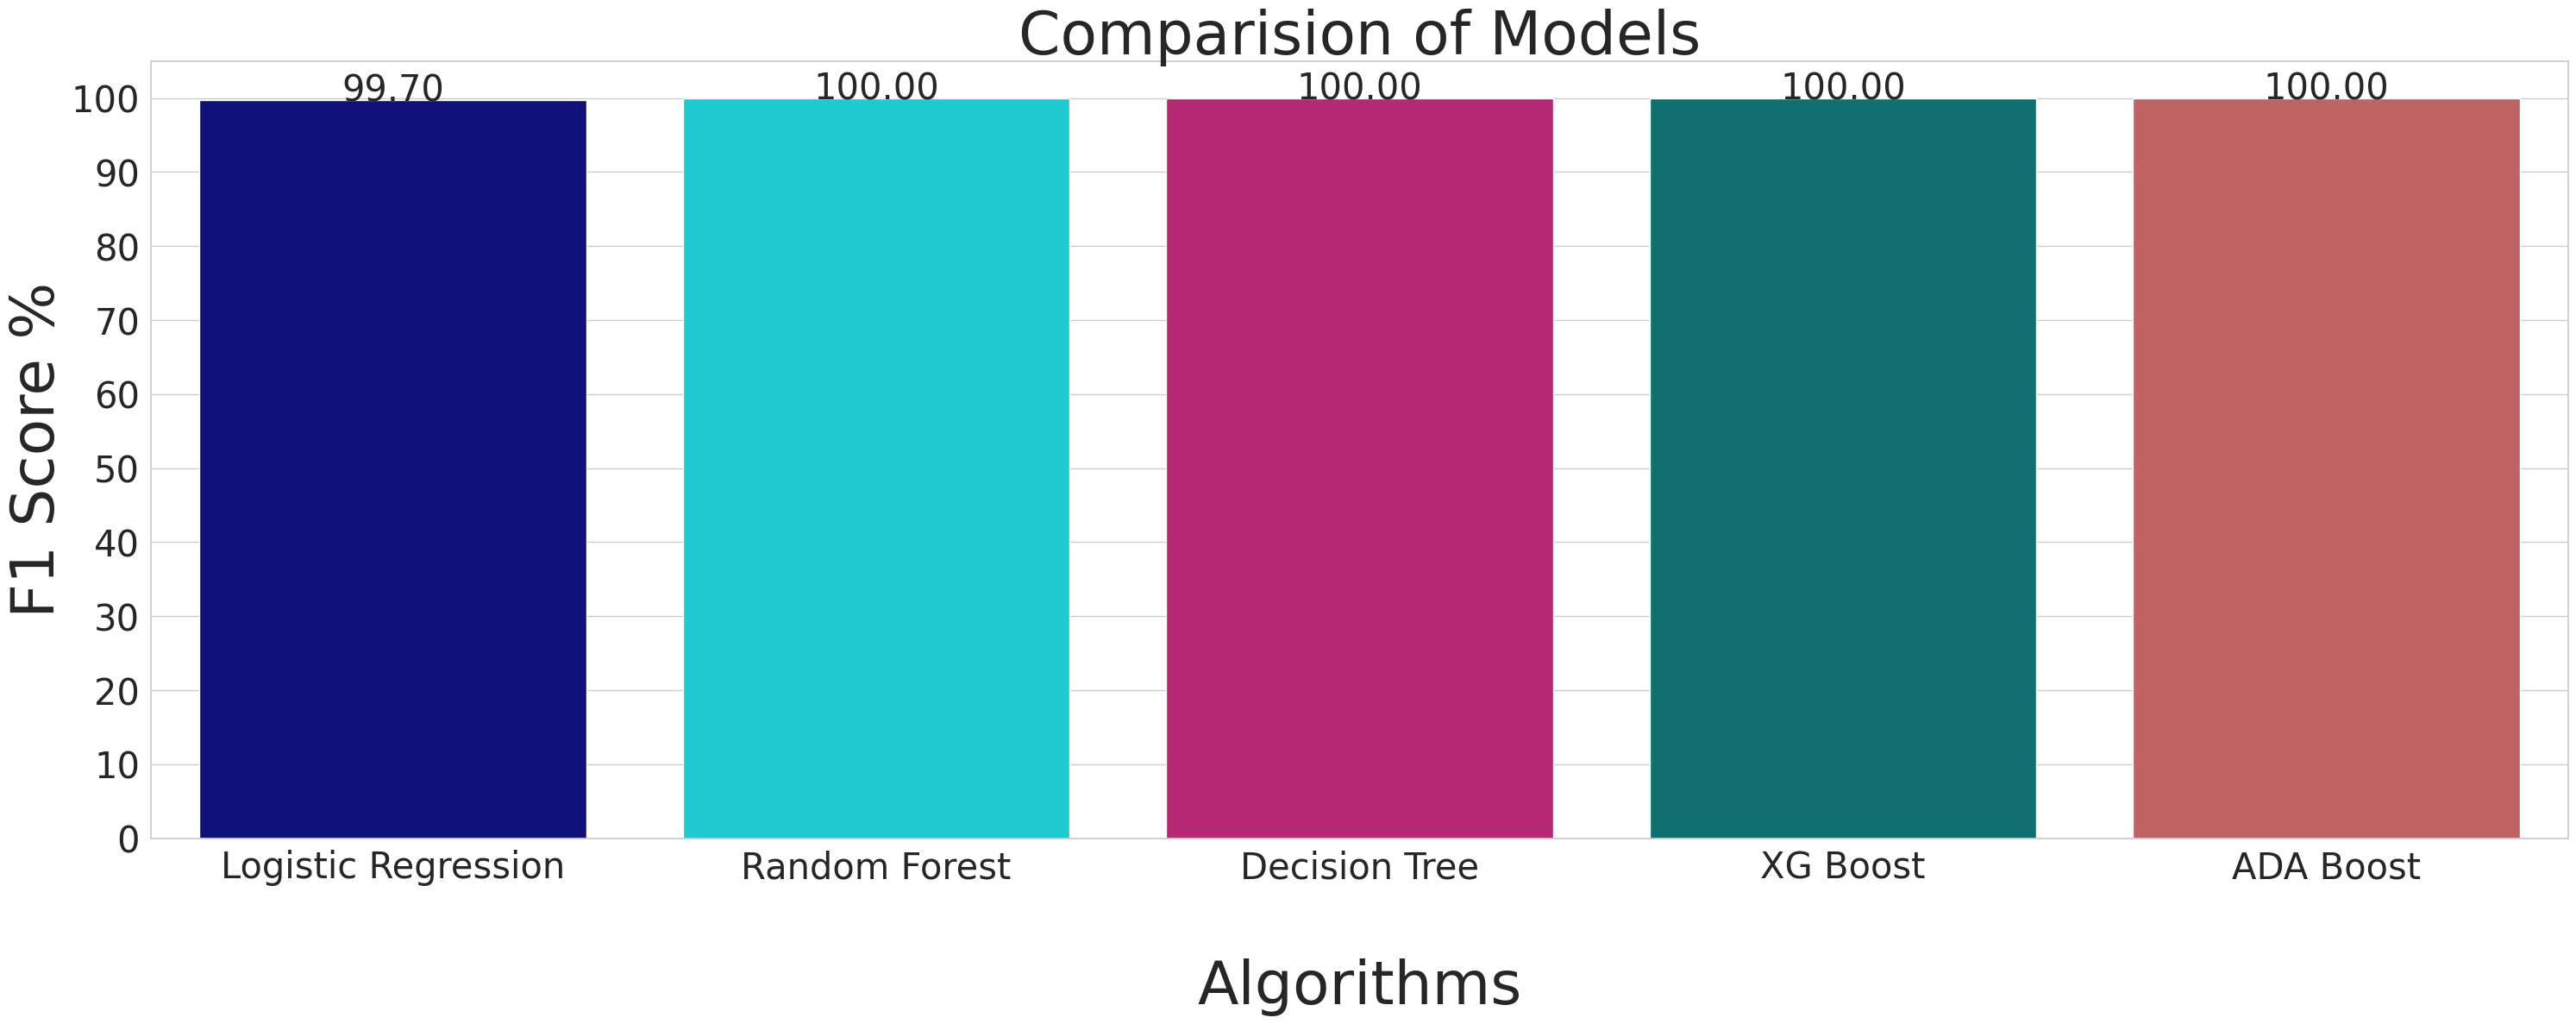

In [ ]:
# F1 Scores Comparison on a Bar Chart
dict_Scores = {'Logistic Regression': f1_score_logr*100,'Random Forest': f1_score_rfc*100,'Decision Tree': f1_score_dtc*100,
                'XG Boost': f1_score_xgb*100, 'ADA Boost': f1_score_ada*100
              }

colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']
sns.set_style("whitegrid")
plt.figure(figsize=(30,12))
plots=sns.barplot(x=list(dict_Scores.keys()), y=list(dict_Scores.values()), palette=colors)
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=30, xytext=(0, 8),
                   textcoords='offset points')
plt.yticks(np.arange(0,101,10), size = 30)
plt.xticks(fontsize=30)
plt.title('Comparision of Models', fontsize=50)
plt.ylabel("F1 Score %", fontsize=50)
plt.xlabel("\nAlgorithms", fontsize=50)
plt.tight_layout()
plt.show()